___
# Ciência dos Dados - PROJETO 1

## André Neustein
___

## Classe Social vs Escolaridade em diferentes gerações

___
## Introdução

    Esse trabalho pretende analisar em Minas Gerais a evolução da escolaridade, nas diferentes classes sociais, através das gerações. Além disso pretende entender como a escolaridade pode ter influenciado no crescimento porcentual de classes sociais mais altas, e como a classe social da pessoa de referência pode influenciar na escolaridade do filho em um ambito geral, sem analizar especificamente ca pessoa de referência com o seu respectivo filho. 

___
## Filtros da base de dados

In [179]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [180]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Elcio\Desktop\FACULDADE\3° SEMESTRE\DP CIENCIA DOS DADOS\PROJETO 1


In [181]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados15 = pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados11 = pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [182]:
dados15.head(15)

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117
5,5,2015,11,15,4,4,4,1,12,2007,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117
6,6,2015,11,15,4,5,4,6,12,2010,...,6.0,793.0,4.0,1,NaN,NaN,NaN,NaN,793.0,20161117
7,7,2015,11,15,4,6,4,8,9,1997,...,6.0,793.0,4.0,5,1.0,2.0,2.0,1.0,793.0,20161117
8,8,2015,11,15,5,1,2,3,1,1969,...,2.0,2900.0,6.0,2,1.0,2.0,2.0,1.0,2900.0,20161117
9,9,2015,11,15,5,2,4,1,1,1934,...,2.0,2900.0,6.0,2,2.0,NaN,NaN,2.0,2900.0,20161117


In [183]:
#selecionando as colunas
dadosPI = dados15[dados15.UF == 31].loc[:,{"V0401","V0601","V6007","V4750",'V8005','V0102'}]
#filtrando os dados
dadosPI = dadosPI[pd.notnull(dadosPI.V0401)]
dadosPI = dadosPI[pd.notnull(dadosPI.V0601)]
dadosPI = dadosPI[pd.notnull(dadosPI.V6007)]
dadosPI = dadosPI[dadosPI.V4750!=999999999999]
#transformando as respostas numéricas em respostas
dadosPI.V0401=dadosPI.V0401.astype('category')
dadosPI.V0401.cat.categories = (['Pessoa de referência','Cônjuge','Filho','Outro parente','Agregado','Pensionista','Empregado doméstico'])
dadosPI.V6007=dadosPI.V6007.astype('category')
dadosPI.V6007.cat.categories = (['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])
dadosPI.V0601=dadosPI.V0601.astype('category')
dadosPI.V0601.cat.categories = (['Sim','Não'])
dadosPI.head(25)

,V8005,V0601,V4750,V0102,V6007,V0401
159852,54,Sim,1900.0,10,Regular do ensino médio ou do 2º grau,Pessoa de referência
159854,40,Sim,450.0,10,Regular do ensino médio ou do 2º grau,Pessoa de referência
159855,34,Sim,450.0,10,Regular do ensino médio ou do 2º grau,Cônjuge
159860,58,Sim,890.0,10,Elementar (primário),Pessoa de referência
159861,60,Sim,890.0,10,Regular do ensino médio ou do 2º grau,Cônjuge
159862,93,Sim,788.0,10,Elementar (primário),Pessoa de referência
159863,81,Sim,788.0,10,Elementar (primário),Cônjuge
159864,36,Sim,897.0,10,Regular do ensino fundamental ou do 1º grau,Pessoa de referência
159866,18,Sim,897.0,10,Regular do ensino médio ou do 2º grau,Filho
159868,79,Sim,897.0,10,Elementar (primário),Outro parente


In [184]:
#mesmo processo para pnad 2011
#selecionando as colunas
dadosPI11 = dados11[dados11.UF == 31].loc[:,{"V0401","V0601","V6007","V4750"}]
#filtrando os dados
dadosPI11 = dadosPI11[pd.notnull(dadosPI11.V0401)]
dadosPI11 = dadosPI11[pd.notnull(dadosPI11.V0601)]
dadosPI11 = dadosPI11[pd.notnull(dadosPI11.V6007)]
dadosPI11 = dadosPI11[dadosPI11.V4750!=999999999999]
#transformando as respostas numéricas em respostas
dadosPI11.V0401=dadosPI11.V0401.astype('category')
dadosPI11.V0401.cat.categories = (['Pessoa de referência','Cônjuge','Filho','Outro parente','Agregado','Pensionista','Empregado doméstico',''])
dadosPI11.V6007=dadosPI11.V6007.astype('category')
dadosPI11.V6007.cat.categories = (['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])
dadosPI11.V0601=dadosPI11.V0601.astype('category')
dadosPI11.V0601.cat.categories = (['Sim','Não'])
dadosPI11.head()

,V6007,V0401,V4750,V0601
163157,Regular do ensino médio ou do 2º grau,Pessoa de referência,363.0,Sim
163158,Regular do ensino médio ou do 2º grau,Cônjuge,363.0,Sim
163163,Elementar (primário),Pessoa de referência,545.0,Sim
163164,Elementar (primário),Pessoa de referência,545.0,Sim
163165,Elementar (primário),Cônjuge,545.0,Sim


In [185]:
dadosPI.V4750.describe()

count    21971.000000
mean      1254.469255
std       1824.954353
min          0.000000
25%        494.000000
50%        788.000000
75%       1301.000000
max      54424.000000
Name: V4750, dtype: float64

In [186]:
dadosPI11.V4750.describe()

count    2.038200e+04
mean     5.082916e+10
std      2.196541e+11
min      0.000000e+00
25%      3.500000e+02
50%      5.960000e+02
75%      1.047000e+03
max      1.000000e+12
Name: V4750, dtype: float64

In [187]:
#transformar renda em faixas 2015
dadosPI.loc[dadosPI.V4750 <= 81, "classe social"] = "Ext baixa"
dadosPI.loc[(dadosPI.V4750 > 81) & (dadosPI.V4750 <= 291), "classe social"] = "Baixa"
dadosPI.loc[(dadosPI.V4750 > 291) & (dadosPI.V4750 <= 441), "classe social"] = "Med Baixa"
dadosPI.loc[(dadosPI.V4750 > 441) & (dadosPI.V4750 <= 641), "classe social"] = "Média"
dadosPI.loc[(dadosPI.V4750 > 641) & (dadosPI.V4750 <= 1019), "classe social"] = "Med Alta"
dadosPI.loc[dadosPI.V4750 > 1019, "classe social"] = "Alta"
dadosPI.head()

,V8005,V0601,V4750,V0102,V6007,V0401,classe social
159852,54,Sim,1900.0,10,Regular do ensino médio ou do 2º grau,Pessoa de referência,Alta
159854,40,Sim,450.0,10,Regular do ensino médio ou do 2º grau,Pessoa de referência,Média
159855,34,Sim,450.0,10,Regular do ensino médio ou do 2º grau,Cônjuge,Média
159860,58,Sim,890.0,10,Elementar (primário),Pessoa de referência,Med Alta
159861,60,Sim,890.0,10,Regular do ensino médio ou do 2º grau,Cônjuge,Med Alta


In [188]:
#transformar renda em faixas 2011
dadosPI11.loc[dadosPI11.V4750 <= 81, "classe social"] = "Ext baixa"
dadosPI11.loc[(dadosPI11.V4750 > 81) & (dadosPI11.V4750 <= 291), "classe social"] = "Baixa"
dadosPI11.loc[(dadosPI11.V4750 > 291) & (dadosPI11.V4750 <= 441), "classe social"] = "Med Baixa"
dadosPI11.loc[(dadosPI11.V4750 > 441) & (dadosPI11.V4750 <= 641), "classe social"] = "Média"
dadosPI11.loc[(dadosPI11.V4750 > 641) & (dadosPI11.V4750 <= 1019), "classe social"] = "Med Alta"
dadosPI11.loc[dadosPI11.V4750 > 1019, "classe social"] = "Alta"
dadosPI11.head()

,V6007,V0401,V4750,V0601,classe social
163157,Regular do ensino médio ou do 2º grau,Pessoa de referência,363.0,Sim,Med Baixa
163158,Regular do ensino médio ou do 2º grau,Cônjuge,363.0,Sim,Med Baixa
163163,Elementar (primário),Pessoa de referência,545.0,Sim,Média
163164,Elementar (primário),Pessoa de referência,545.0,Sim,Média
163165,Elementar (primário),Cônjuge,545.0,Sim,Média


In [189]:
dadosPI["classe social"].value_counts()

Alta         7926
Med Alta     5923
Média        3338
Med Baixa    2432
Baixa        1932
Ext baixa     420
Name: classe social, dtype: int64

In [190]:
#fazendo uma tabela com apenas os pais de 2015
dados15pai = dadosPI[dadosPI.V0401 == 'Pessoa de referência']
dados15pai.head(15)

,V8005,V0601,V4750,V0102,V6007,V0401,classe social
159852,54,Sim,1900.0,10,Regular do ensino médio ou do 2º grau,Pessoa de referência,Alta
159854,40,Sim,450.0,10,Regular do ensino médio ou do 2º grau,Pessoa de referência,Média
159860,58,Sim,890.0,10,Elementar (primário),Pessoa de referência,Med Alta
159862,93,Sim,788.0,10,Elementar (primário),Pessoa de referência,Med Alta
159864,36,Sim,897.0,10,Regular do ensino fundamental ou do 1º grau,Pessoa de referência,Med Alta
159869,44,Sim,119.0,10,Regular do ensino fundamental ou do 1º grau,Pessoa de referência,Baixa
159874,21,Sim,775.0,10,Regular do ensino médio ou do 2º grau,Pessoa de referência,Med Alta
159878,28,Sim,1269.0,10,Regular do ensino fundamental ou do 1º grau,Pessoa de referência,Alta
159880,39,Sim,396.0,10,Regular do ensino fundamental ou do 1º grau,Pessoa de referência,Med Baixa
159886,49,Sim,262.0,10,Regular do ensino médio ou do 2º grau,Pessoa de referência,Baixa


In [191]:
#fazendo uma tabela com apenas os pais de 2011
dados11pai = dadosPI11[dadosPI11.V0401 == 'Pessoa de referência']
dados11pai.head(15)

,V6007,V0401,V4750,V0601,classe social
163157,Regular do ensino médio ou do 2º grau,Pessoa de referência,363.0,Sim,Med Baixa
163163,Elementar (primário),Pessoa de referência,545.0,Sim,Média
163164,Elementar (primário),Pessoa de referência,545.0,Sim,Média
163166,Regular do ensino fundamental ou do 1º grau,Pessoa de referência,215.0,Sim,Baixa
163173,Elementar (primário),Pessoa de referência,936.0,Sim,Med Alta
163178,Educação de jovens e adultos ou supletivo de e...,Pessoa de referência,466.0,Sim,Média
163181,Elementar (primário),Pessoa de referência,413.0,Sim,Med Baixa
163184,Regular do ensino médio ou do 2º grau,Pessoa de referência,700.0,Sim,Med Alta
163186,Regular do ensino fundamental ou do 1º grau,Pessoa de referência,545.0,Sim,Média
163196,Regular do ensino médio ou do 2º grau,Pessoa de referência,363.0,Sim,Med Baixa


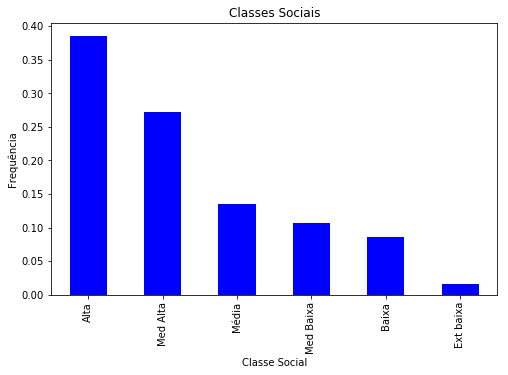

In [192]:
graf1 = dados15pai["classe social"].value_counts(normalize = True)
graf1.plot (kind='bar', color=('blue'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Classe Social')
plt.title("Classes Sociais")

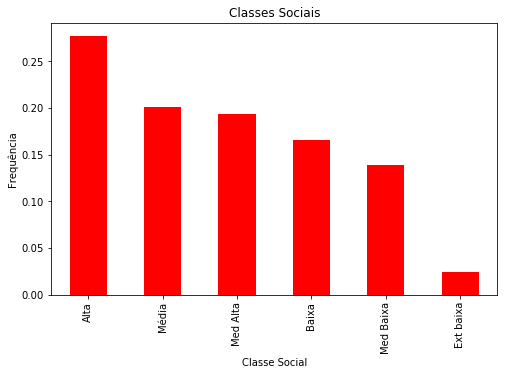

In [193]:
graf111 = dados11pai["classe social"].value_counts(normalize = True)
graf111.plot (kind='bar', color=('red'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Classe Social')
plt.title("Classes Sociais")

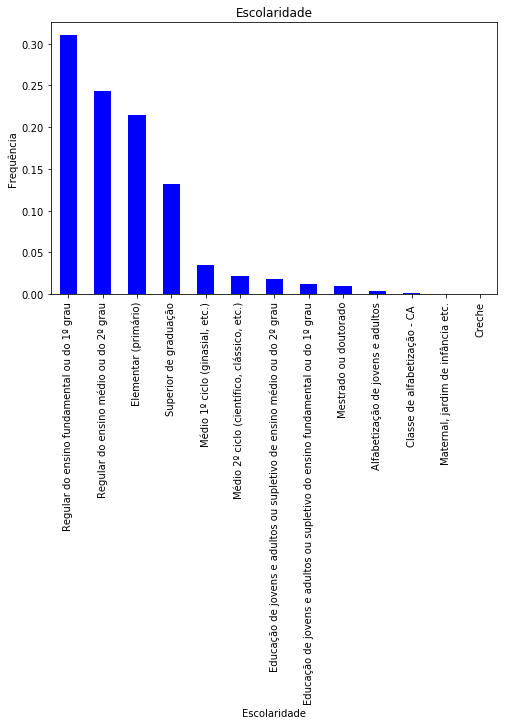

In [194]:
graf2 = dados15pai.V6007.value_counts(normalize = True)
graf2.plot (kind='bar',stacked = True, color=('blue'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade")

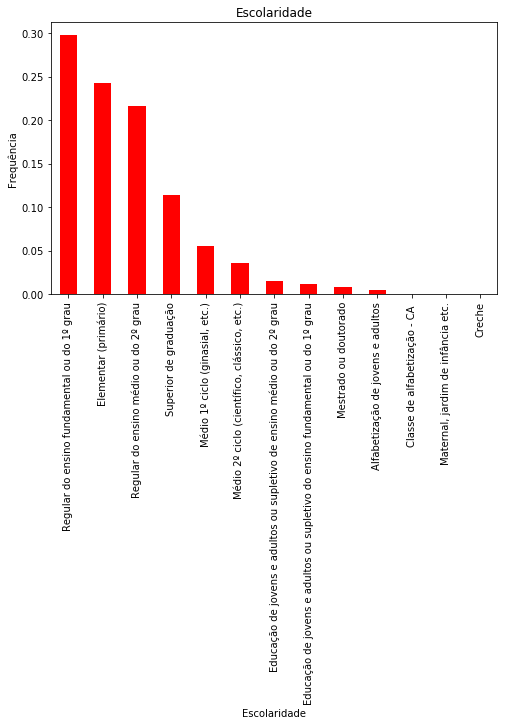

In [195]:
graf112 = dados11pai.V6007.value_counts(normalize = True)
graf112.plot (kind='bar',stacked = True, color=('red'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade")

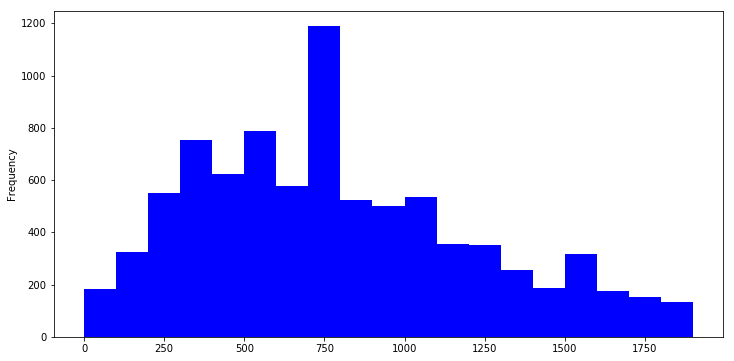

In [196]:
renda = dados15pai.V4750
renda.plot (kind='hist', color=("blue"),  bins=range(0,2000,100), figsize=(12,6))

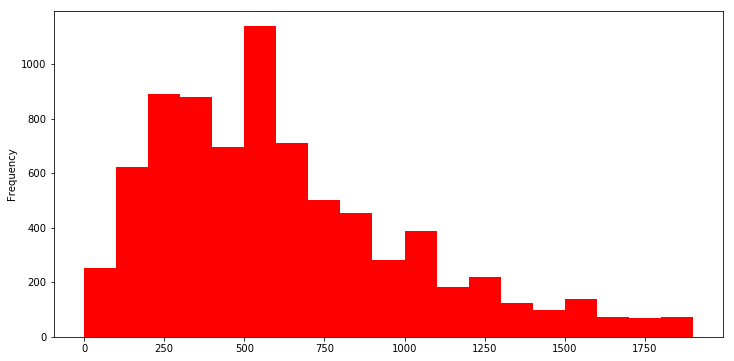

In [197]:
renda = dados11pai.V4750
renda.plot (kind='hist', color=("red"),  bins=range(0,2000,100), figsize=(12,6))

In [198]:
#fazendo uma tabela com os filhos de 2015
dados15filho = dadosPI[dadosPI.V0401 == 'Filho']
dados15filho.head(15)

,V8005,V0601,V4750,V0102,V6007,V0401,classe social
159866,18,Sim,897.0,10,Regular do ensino médio ou do 2º grau,Filho,Med Alta
159870,19,Sim,119.0,10,Superior de graduação,Filho,Baixa
159882,17,Sim,396.0,10,Regular do ensino médio ou do 2º grau,Filho,Med Baixa
159887,22,Sim,262.0,10,Regular do ensino médio ou do 2º grau,Filho,Baixa
159888,20,Sim,262.0,10,Regular do ensino médio ou do 2º grau,Filho,Baixa
159908,33,Sim,525.0,29,Regular do ensino médio ou do 2º grau,Filho,Média
159913,20,Sim,51.0,29,Regular do ensino fundamental ou do 1º grau,Filho,Ext baixa
159916,40,Sim,459.0,29,Regular do ensino fundamental ou do 1º grau,Filho,Média
159921,45,Não,0.0,29,Regular do ensino fundamental ou do 1º grau,Filho,Ext baixa
159926,47,Sim,744.0,29,Regular do ensino médio ou do 2º grau,Filho,Med Alta


In [199]:
#fazendo uma tabela com os filhos de 2011
dados11filho = dadosPI11[dadosPI11.V0401 == 'Filho']
dados11filho.head(15)

,V6007,V0401,V4750,V0601,classe social
163176,Regular do ensino fundamental ou do 1º grau,Filho,936.0,Sim,Med Alta
163177,Regular do ensino fundamental ou do 1º grau,Filho,936.0,Sim,Med Alta
163180,Regular do ensino médio ou do 2º grau,Filho,466.0,Sim,Média
163191,Regular do ensino médio ou do 2º grau,Filho,300.0,Sim,Med Baixa
163202,Regular do ensino médio ou do 2º grau,Filho,346.0,Sim,Med Baixa
163206,Elementar (primário),Filho,272.0,Sim,Baixa
163214,Regular do ensino médio ou do 2º grau,Filho,633.0,Sim,Média
163219,Regular do ensino fundamental ou do 1º grau,Filho,363.0,Sim,Med Baixa
163239,Regular do ensino fundamental ou do 1º grau,Filho,400.0,Sim,Med Baixa
163245,Regular do ensino fundamental ou do 1º grau,Filho,645.0,Sim,Med Alta


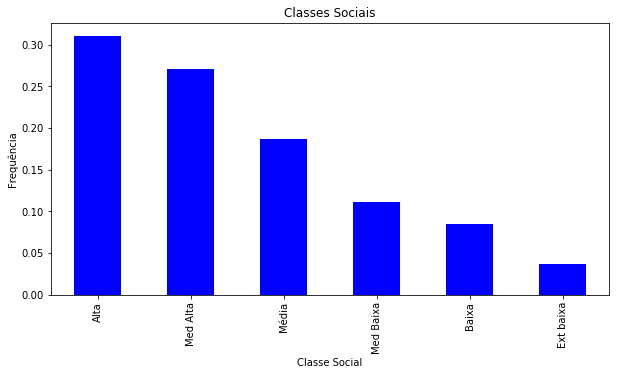

In [200]:
graf3 = dados15filho["classe social"].value_counts(normalize = True)
graf3.plot (kind='bar', color=('blue'), figsize=(10,5))
plt.ylabel('Frequência')
plt.xlabel('Classe Social')
plt.title("Classes Sociais")

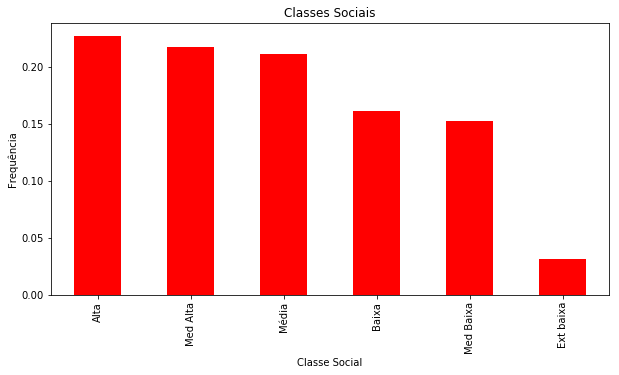

In [201]:
graf113 = dados11filho["classe social"].value_counts(normalize = True)
graf113.plot (kind='bar', color=('red'), figsize=(10,5))
plt.ylabel('Frequência')
plt.xlabel('Classe Social')
plt.title("Classes Sociais")

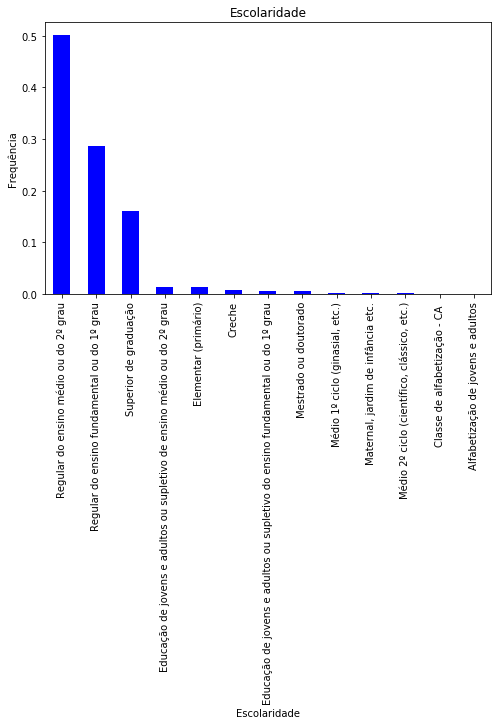

In [221]:
graf4 = dados15filho.V6007.value_counts(normalize = True)
graf4.plot (kind='bar', color=('blue'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade")

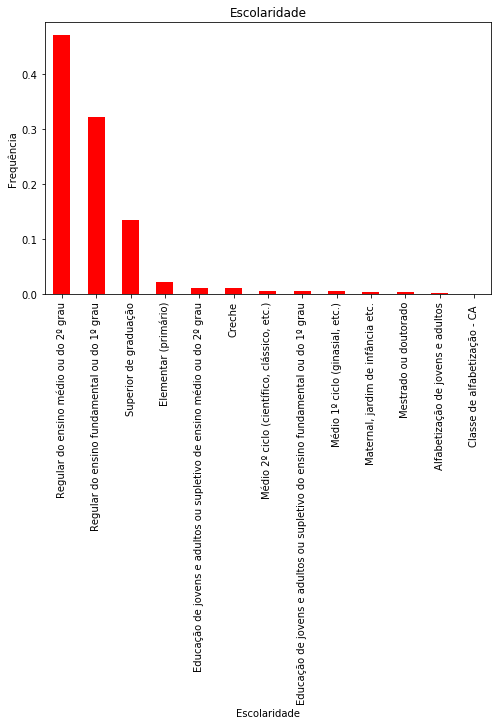

In [222]:
graf114 = dados11filho.V6007.value_counts(normalize = True)
graf114.plot (kind='bar', color=('red'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade")

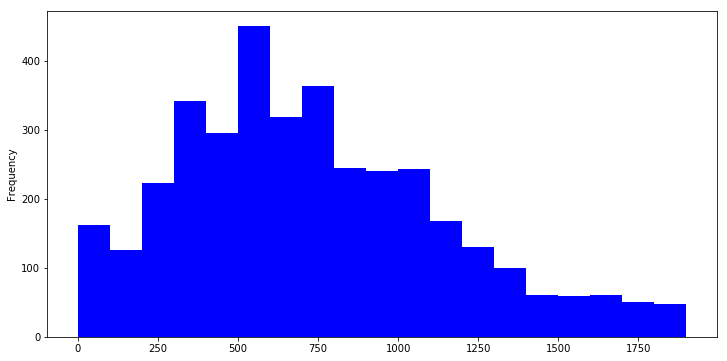

In [204]:
rendafilho = dados15filho.V4750
rendafilho.plot (kind='hist', color=("blue"),  bins=range(0,2000,100), figsize=(12,6))

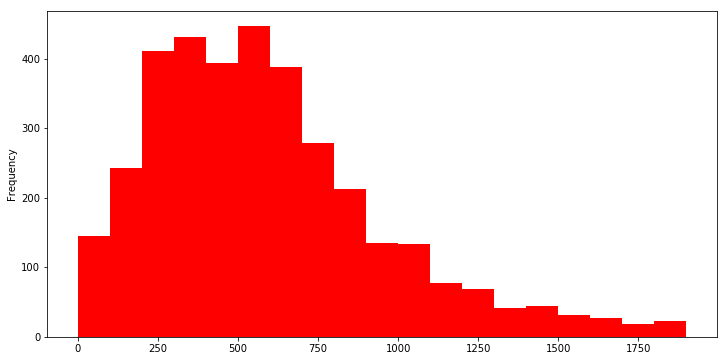

In [205]:
rendafilho = dados11filho.V4750
rendafilho.plot (kind='hist', color=("red"),  bins=range(0,2000,100), figsize=(12,6))

In [206]:
#mudando o nome das colunas
#dadosPI = dadosPI.rename (columns = {"V0401":"Papel na familia"})
#dadosPI = dadosPI.rename (columns = {"V0601":"Sabe ler e escrever"})
#dadosPI = dadosPI.rename (columns = {"V6007":"Curso mais elevado que frequentou"})
#dadosPI = dadosPI.rename (columns = {"V4750":"Rendimento familiar per capta"})
#dadosPI.head()

___
## Análise e Resultados

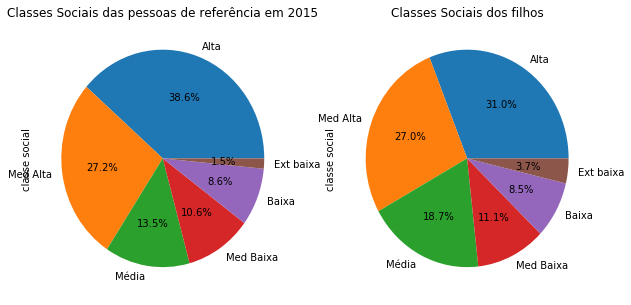

In [207]:
plt.subplot(121)
graf1.plot (kind='pie', autopct='%1.1f%%', figsize=(10,5))
plt.title("Classes Sociais das pessoas de referência em 2015")

plt.subplot(122)
graf3.plot (kind='pie', autopct='%1.1f%%', figsize=(10,5))
plt.title("Classes Sociais dos filhos")

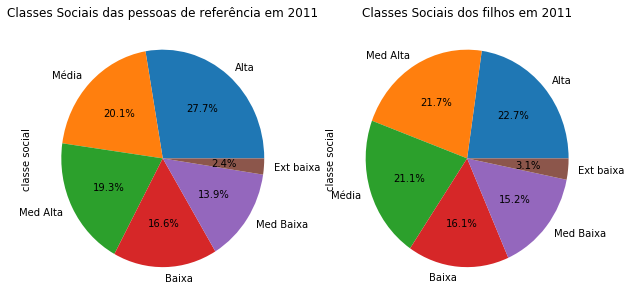

In [209]:
plt.subplot(121)
graf111.plot (kind='pie', autopct='%1.1f%%', figsize=(10,5))
plt.title("Classes Sociais das pessoas de referência em 2011")

plt.subplot(122)
graf113.plot (kind='pie', autopct='%1.1f%%', figsize=(10,5))
plt.title("Classes Sociais dos filhos em 2011")

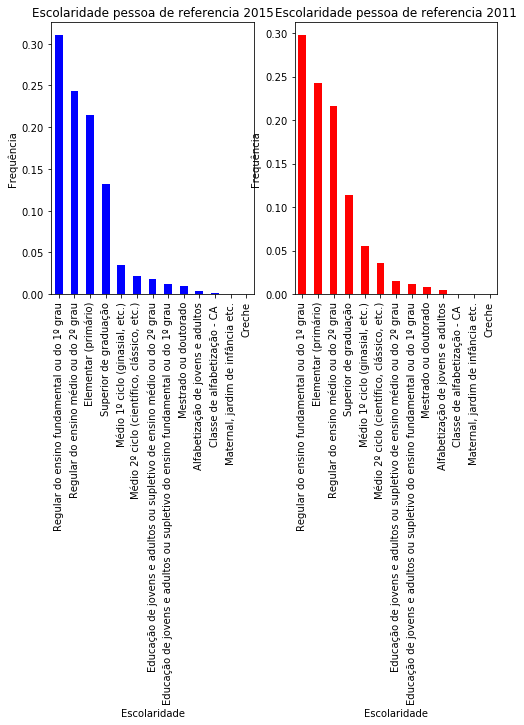

In [220]:
plt.subplot(121)
graf2 = dados15pai.V6007.value_counts(normalize = True)
graf2.plot (kind='bar',stacked = True, color=('blue'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade pessoa de referencia 2015")

plt.subplot(122)
graf112 = dados11pai.V6007.value_counts(normalize = True)
graf112.plot (kind='bar',stacked = True, color=('red'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade pessoa de referencia 2011")

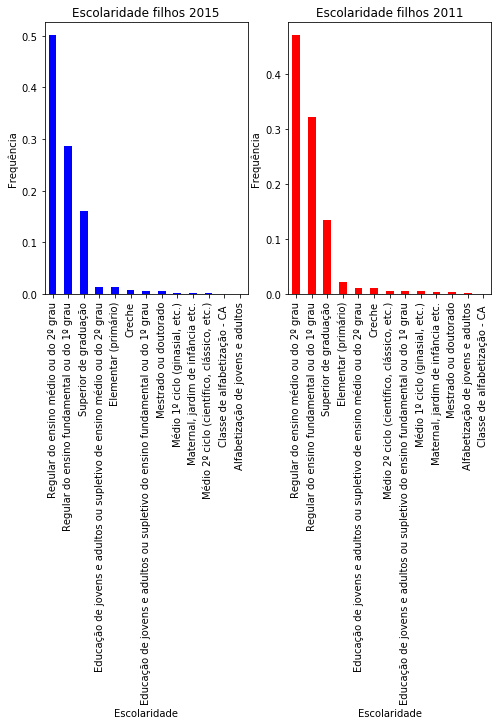

In [225]:
plt.subplot(121)
graf4 = dados15filho.V6007.value_counts(normalize = True)
graf4.plot (kind='bar', color=('blue'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade filhos 2015")

plt.subplot(122)
graf114 = dados11filho.V6007.value_counts(normalize = True)
graf114.plot (kind='bar', color=('red'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade filhos 2011")

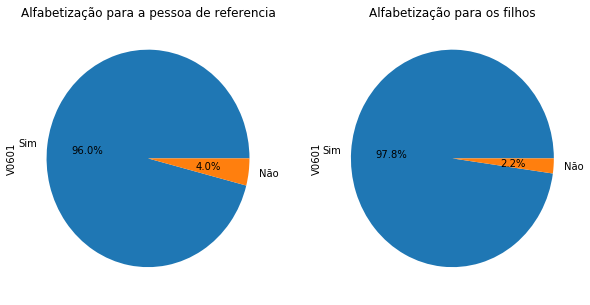

In [210]:
plt.subplot(121)
graf5 = dados15pai.V0601.value_counts(normalize = True)
graf5.plot (kind = 'pie',autopct='%1.1f%%', figsize = (10,5))
plt.title("Alfabetização para a pessoa de referencia")

plt.subplot(122)
graf6 = dados15filho.V0601.value_counts(normalize=True)
graf6.plot (kind = 'pie',autopct='%1.1f%%', figsize = (10,5))
plt.title('Alfabetização para os filhos')

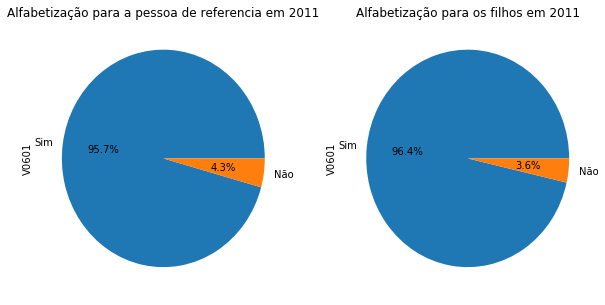

In [211]:
plt.subplot(121)
graf115 = dados11pai.V0601.value_counts(normalize = True)
graf115.plot (kind = 'pie',autopct='%1.1f%%', figsize = (10,5))
plt.title("Alfabetização para a pessoa de referencia em 2011")

plt.subplot(122)
graf116 = dados11filho.V0601.value_counts(normalize=True)
graf116.plot (kind = 'pie',autopct='%1.1f%%', figsize = (10,5))
plt.title('Alfabetização para os filhos em 2011')

In [212]:
tab1 = pd.crosstab(dados15pai.V0601, dados15pai['classe social'])
tab2 = pd.crosstab(dados15filho.V0601, dados15filho['classe social'])

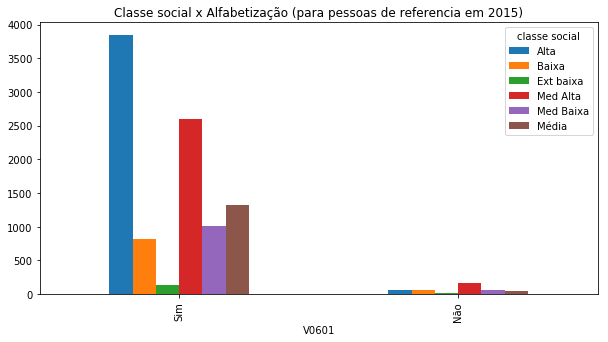

In [214]:
tab1.plot (kind='bar',figsize=(10,5))
plt.title ("Classe social x Alfabetização (para pessoas de referencia em 2015)")

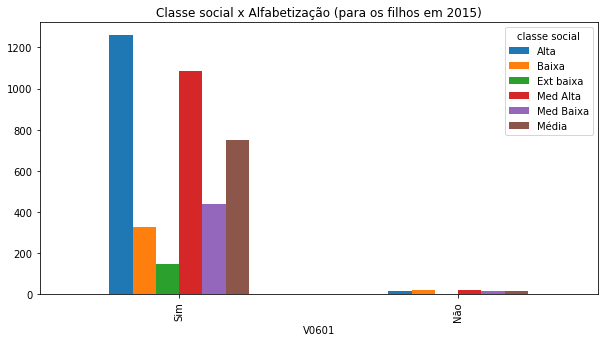

In [215]:
tab2.plot (kind='bar', figsize=(10,5))
plt.title ('Classe social x Alfabetização (para os filhos em 2015)')

In [176]:
tab3 = pd.crosstab(dados11pai.V0601, dados15pai['classe social'])
tab4 = pd.crosstab(dados11filho.V0601, dados15filho['classe social'])

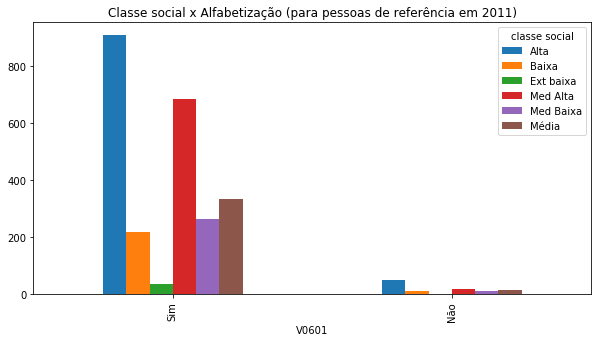

In [216]:
tab3.plot (kind = 'bar', figsize = (10,5))
plt.title ('Classe social x Alfabetização (para pessoas de referência em 2011)')

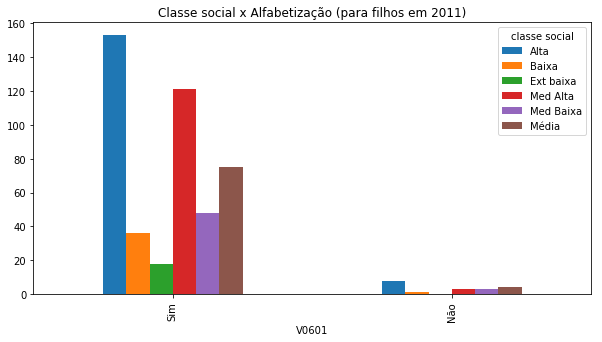

In [217]:
tab4.plot (kind = 'bar', figsize = (10,5))
plt.title ('Classe social x Alfabetização (para filhos em 2011)')

___
## Conclusão 

    Primeiro é facil reparar em uma grande ascenção social em relação as pessoas de referência de 2011 para 2015, a classe alta cresceu em 10%, e a média alta em 8%, porém a classe média caiu em aproximadamente 7% que provavelmente ascenderam e não baixaram sua classe social. O mesmo se observa nos filhos, enquanto em 2011 as classes extremamente baixa, baixa e média baixa representava 34,4% dos filhos em 2015 essas mesma classes passam a representar 23,3% dos filhos, uma diminuição considerável nas classes baixas de BH. A alfabetização é algo que não parece interferir nos dados, já que sua taxa é extremamente alta o nível mais alto de analfabetos é de 4,3% entre as pessoas de referência em 2011 e o maior número deles nesse ano está na classe alta, o que é bastante surpreendente. Para a pessoa de referencia em ambos os anos aproximadamente 30% tinha feito até o ensino fundamental apenas, e em quanto em 2015 aproximadamente 25% eram escolarizados até o ensino médio, em 2011 um quarto das pessoas de referencia tinham apenas o ensino elementar (primário). Em ambos os anos o número de pessoas de referência não passa de 15% com o ano de 2015 se sobressaindo nessa procentagem. Agora olhando para os filhos observamos que em 2015 mais que 90% tinha ensino fundamental completo, mais que 65% tinha ensino médio completo e quase 15% tinha feito graduação. Em 2011 mais que 90% das pessoas tinham o ensino fundamental completo, porém, dessas, menos de 50% tinham o ensino médio completo e um pouco mais de 10% ja tinha feito graduação.
    Com esses dados apontam para algumas conclusões. Com o crescimento da classe social nota-se um crescimento da escolaridade dos filhos, com isso podemos concluir que a escolaridade depende da classe social, as classes sociais mais altas costumam a ficar mais tempo na escola. Nota-se também que junto com a ascensão social cresceu se a porcentagem de escolaridade em Minas Gerais, o que nos indica que a partir da maior esolaridade a sua possibilidade de ascensão social cresce, porém ainda existe analfabetos entre as classes altas, as excessões as regras, que ascenderam socialmente sem precisar de um alto nivel escolar. Logo concluimos com a amostra de Minas Gerais que com niveis escolares mais alto sua ascensão social se torna mais viável e em classe sociais mais altas a sua probabilidade de ser bem escolarizado também é maior.